In [24]:
import geopandas as gpd
import pandas as pd

In [25]:
# Load state and county data
states = gpd.read_parquet("data/us_states.parquet")
counties = gpd.read_parquet("data/us_counties.parquet")
gdf = gpd.read_parquet("data/heat_risk_analysis_Day 1.geoparquet")

In [6]:
states.head(3)

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      35  00897535  0400000US35    35     NM    New Mexico   00   
1      46  01785534  0400000US46    46     SD  South Dakota   00   
2      06  01779778  0400000US06    06     CA    California   00   

          ALAND       AWATER  \
0  314198560935    726482115   
1  196345992286   3383664203   
2  403671196038  20294133830   

                                            geometry  
0  POLYGON ((-109.05017 31.48, -109.04984 31.4995...  
1  POLYGON ((-104.05788 44.9976, -104.05078 44.99...  
2  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...

In [7]:
counties.head(3)

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME        NAMELSAD  \
0      13      031  00350302  0500000US13031  13031  Bulloch  Bulloch County   
1      13      121  01694833  0500000US13121  13121   Fulton   Fulton County   
2      13      179  00357095  0500000US13179  13179  Liberty  Liberty County   

  STUSPS STATE_NAME LSAD       ALAND     AWATER  \
0     GA    Georgia   06  1750735216   32827779   
1     GA    Georgia   06  1364133162   19666288   
2     GA    Georgia   06  1337654102  222884791   

                                            geometry  
0  POLYGON ((-82.02684 32.55516, -82.02527 32.558...  
1  POLYGON ((-84.84931 33.51318, -84.84429 33.514...  
2  POLYGON ((-81.8244 32.01488, -81.81338 32.0162...

In [9]:
gdf.head(3)

geometry  raster_value  \
0  POLYGON ((-94.97295 49.35965, -94.97295 49.344...           3.0   
1  POLYGON ((-122.05381 49.0167, -122.05381 48.98...           3.0   
2  POLYGON ((-121.59752 49.0167, -121.59752 48.98...           1.0   

   weighted_ALAND20  weighted_AWATER20  weighted_STATEFP10  weighted_GEOID10  \
0      3.236599e+08       1.219293e+09                27.0         2756711.0   
1      1.309284e+08       9.274130e+05                53.0         5398266.0   
2      2.427287e+09       4.045061e+07                30.0         3059928.0   

   weighted_MULTI_STATE  weighted_POP  weighted_PR_HRI  weighted_F_HRI  ...  \
0                   0.0          96.0           -999.0          -999.0  ...   
1                   0.0        3642.0             20.0             0.5  ...   
2                   0.0          88.0             98.0             1.0  ...   

   weighted_OVERALL_RANK  mode_ZCTA5CE20  mode_AFFGEOID20  mode_GEOID20  \
0                 0.8957           56711   860Z200US56711         56711   
1                 0.8204           98266   860Z200US98266         98266   
2                 0.5468           59928   860Z200US59928         59928   

   mode_NAME20  mode_LSAD20  mode_STATE  mode_STATE_ABV  mode_ZCTA  highlight  
0        56711           Z5          MN       Minnesota      56711       True  
1        98266           Z5          WA      Washington      98266      False  
2        59928           Z5          MT         Montana      59928      False  

[3 rows x 85 columns]

In [11]:
gdf[gdf['weighted_MULTI_STATE']==1]

geometry  raster_value  \
379    POLYGON ((-120.47961 48.58089, -120.47961 48.5...           2.0   
380    POLYGON ((-121.48345 48.5658, -121.48345 48.55...           2.0   
547    POLYGON ((-113.54399 48.36914, -113.54399 48.3...           2.0   
548    POLYGON ((-112.33482 48.36914, -112.33482 48.3...           1.0   
1162   POLYGON ((-114.45657 47.68254, -114.45657 47.6...           1.0   
...                                                  ...           ...   
22969  POLYGON ((-99.23927 27.24297, -99.23927 27.222...           2.0   
23054  POLYGON ((-97.23159 26.38782, -97.23159 26.346...           2.0   
23055  POLYGON ((-80.87357 26.40825, -80.87357 26.387...           3.0   
23103  POLYGON ((-80.89638 25.79362, -80.89638 25.773...           2.0   
23104  POLYGON ((-80.71387 25.75253, -80.71387 25.731...           2.0   

       weighted_ALAND20  weighted_AWATER20  weighted_STATEFP10  \
379        6.061253e+08          6393581.0                27.0   
380        6.061253e+08          6393581.0                38.0   
547        6.061253e+08          6393581.0                27.0   
548        6.061253e+08          6393581.0                38.0   
1162       6.797622e+08          7160478.0                38.0   
...                 ...                ...                 ...   
22969      1.484803e+09           816622.0                49.0   
23054      1.484803e+09           816622.0                 4.0   
23055      1.484803e+09           816622.0                49.0   
23103      7.069228e+08          2998729.0                49.0   
23104      7.069228e+08          2998729.0                 4.0   

       weighted_GEOID10  weighted_MULTI_STATE  weighted_POP  weighted_PR_HRI  \
379           2758225.0                   1.0        1125.0             20.0   
380           3858225.0                   1.0        1125.0             20.0   
547           2758225.0                   1.0        1125.0             20.0   
548           3858225.0                   1.0        1125.0             20.0   
1162          3859221.0                   1.0        1658.0             82.0   
...                 ...                   ...           ...              ...   
22969         4984536.0                   1.0        1454.0             95.0   
23054          484536.0                   1.0        1454.0             95.0   
23055         4984536.0                   1.0        1454.0             95.0   
23103         4984531.0                   1.0         642.0             81.0   
23104          484531.0                   1.0         642.0             81.0   

       weighted_F_HRI  ...  weighted_OVERALL_RANK  mode_ZCTA5CE20  \
379              0.25  ...                 0.0844           58225   
380              0.25  ...                 0.0844           58225   
547              0.25  ...                 0.0844           58225   
548              0.25  ...                 0.0844           58225   
1162             1.00  ...                 0.6733           59221   
...               ...  ...                    ...             ...   
22969            1.00  ...                 0.9884           84536   
23054            1.00  ...                 0.9884           84536   
23055            1.00  ...                 0.9884           84536   
23103            1.00  ...                 0.9821           84531   
23104            1.00  ...                 0.9821           84531   

       mode_AFFGEOID20  mode_GEOID20  mode_NAME20  mode_LSAD20  mode_STATE  \
379     860Z200US58225         58225        58225           Z5          MN   
380     860Z200US58225         58225        58225           Z5          ND   
547     860Z200US58225         58225        58225           Z5          MN   
548     860Z200US58225         58225        58225           Z5          ND   
1162    860Z200US59221         59221        59221           Z5          ND   
...                ...           ...          ...          ...         ...   
22969   860Z200US84536        

In [12]:
zcta_to_county_file = "data/zcta_county_rel_10.txt"
zcta_to_county = pd.read_csv(zcta_to_county_file, dtype={'ZCTA5': str, 'GEOID': str})

In [13]:
zcta_to_county

ZCTA5  STATE  COUNTY  GEOID  POPPT   HUPT      AREAPT  AREALANDPT  \
0      00601     72       1  72001  18465   7695   165132671   164333375   
1      00601     72     141  72141    105     49     2326414     2326414   
2      00602     72       3  72003  41520  18073    83734431    79288158   
3      00603     72       5  72005  54689  25653    82063867    81880442   
4      00606     72      93  72093   6276   2740    94864349    94851862   
...      ...    ...     ...    ...    ...    ...         ...         ...   
44405  99923      2     198  02198     87     90    35939636    35937519   
44406  99925      2     198  02198    819    400   181409664   144503281   
44407  99926      2     198  02198   1460    544   557283125   343947256   
44408  99927      2     198  02198     94    101   607689356   589688205   
44409  99929      2     275  02275   2338   1339  6235969341  5598556684   

        ZPOP    ZHU  ...       COAREA   COAREALAND  ZPOPPCT  ZHUPCT  ZAREAPCT  \
0      18570   7744  ...    173777444    172725651    99.43   99.37     98.61   
1      18570   7744  ...    298027589    294039825     0.57    0.63      1.39   
2      41520  18073  ...    117948080     79904246   100.00  100.00    100.00   
3      54689  25653  ...    195741178     94608641   100.00  100.00    100.00   
4       6615   2877  ...     94864349     94851862    94.88   95.24     86.56   
...      ...    ...  ...          ...          ...      ...     ...       ...   
44405     87     90  ...  19899611817  10160193695   100.00  100.00    100.00   
44406    819    400  ...  19899611817  10160193695   100.00  100.00    100.00   
44407   1460    544  ...  19899611817  10160193695   100.00  100.00    100.00   
44408     94    101  ...  19899611817  10160193695   100.00  100.00    100.00   
44409   2338   1339  ...   8966687298   6582411037   100.00  100.00    100.00   

       ZAREALANDPCT  COPOPPCT  COHUPCT  COAREAPCT  COAREALANDPCT  
0             98.60     94.77    94.71      95.03          95.14  
1              1.40      0.32     0.35       0.78           0.79  
2            100.00     98.95    98.99      70.99          99.23  
3            100.00     89.73    90.23      41.92          86.55  
4             86.56    100.00   100.00     100.00         100.00  
...             ...       ...      ...        ...            ...  
44405        100.00      1.57     3.01       0.18           0.35  
44406        100.00     14.73    13.37       0.91           1.42  
44407        100.00     26.26    18.18       2.80           3.39  
44408        100.00      1.69     3.38       3.05           5.80  
44409        100.00     98.69    93.77      69.55          85.05  

[44410 rows x 24 columns]

In [15]:
# Load the Excel file
file_path = './data/HHI Data Dictionary 2024.xlsx'
sheet_name = '2024 Data Dictionary'

# Read the specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Define the output CSV file path
output_csv_path = './data/HHI_Data_Dictionary_2024.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)

output_csv_path

'./data/HHI_Data_Dictionary_2024.csv'

In [17]:
df.head()

2024 VARIABLE NAME                                   2024 DESCRIPTION  \
0          STATEFP10                              State-level FIPS code   
1              STATE                                         State name   
2          STATE_ABV                                 State abbreviation   
3               ZCTA                      ZIP Code Tabulation Area code   
4            GEOID10  Unique ID combination of State FIPS and ZCTA code   

     MODULE DATA SOURCE 2024 TABLE FIELD CALCULATION CALCULATION DESCRIPTION  \
0  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
1  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
2  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
3  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
4  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   

      NOTES  
0  NO VALUE  
1  NO VALUE  
2  NO VALUE  
3  NO VALUE  
4  NO VALUE

In [18]:
df['weighted_2024 VARIABLE NAME'] = 'weighted_' + df['2024 VARIABLE NAME']

In [19]:
df.head()

2024 VARIABLE NAME                                   2024 DESCRIPTION  \
0          STATEFP10                              State-level FIPS code   
1              STATE                                         State name   
2          STATE_ABV                                 State abbreviation   
3               ZCTA                      ZIP Code Tabulation Area code   
4            GEOID10  Unique ID combination of State FIPS and ZCTA code   

     MODULE DATA SOURCE 2024 TABLE FIELD CALCULATION CALCULATION DESCRIPTION  \
0  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
1  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
2  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
3  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
4  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   

      NOTES weighted_2024 VARIABLE NAME  
0  NO VALUE          weighted_STATEFP10  
1  NO VALUE              weighted_STATE  
2  NO VALUE          weighted_STATE_ABV  
3  NO VALUE               weighted_ZCTA  
4  NO VALUE            weighted_GEOID10

In [20]:
df.to_csv(output_csv_path, index=False)

In [21]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [22]:
df.head()

2024_VARIABLE_NAME                                   2024_DESCRIPTION  \
0          STATEFP10                              State-level FIPS code   
1              STATE                                         State name   
2          STATE_ABV                                 State abbreviation   
3               ZCTA                      ZIP Code Tabulation Area code   
4            GEOID10  Unique ID combination of State FIPS and ZCTA code   

     MODULE DATA_SOURCE 2024_TABLE_FIELD_CALCULATION CALCULATION_DESCRIPTION  \
0  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
1  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
2  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
3  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   
4  NO VALUE    NO VALUE                     NO VALUE                NO VALUE   

      NOTES weighted_2024_VARIABLE_NAME  
0  NO VALUE          weighted_STATEFP10  
1  NO VALUE              weighted_STATE  
2  NO VALUE          weighted_STATE_ABV  
3  NO VALUE               weighted_ZCTA  
4  NO VALUE            weighted_GEOID10

In [23]:
df.to_csv(output_csv_path, index=False)

In [ ]:
['weighted_OVERALL_SCORE', 'weighted_ALAND20', 'weighted_AWATER20','weighted_STATEFP10', 'weighted_GEOID10', 'weighted_MULTI_STATE',
       'weighted_POP', 'weighted_PR_HRI', 'weighted_F_HRI', 'weighted_LOW_EMS',
       'weighted_P_NEHD', 'weighted_PR_NEHD', 'weighted_HHB_SCORE',
       'weighted_HHB_RANK', 'weighted_P_CHD', 'weighted_PR_CHD',
       'weighted_F_CHD', 'weighted_P_OBS', 'weighted_PR_OBS', 'weighted_F_OBS',
       'weighted_P_DIABETES', 'weighted_PR_DIABETES', 'weighted_F_DIABETES',
       'weighted_P_COPD', 'weighted_PR_COPD', 'weighted_F_COPD',
       'weighted_P_ASTHMA', 'weighted_PR_ASTHMA', 'weighted_F_ASTHMA',
       'weighted_P_MNTHL', 'weighted_PR_MNTHL', 'weighted_F_MNTHL',
       'weighted_F_SEN_COUNT', 'weighted_SEN_SCORE', 'weighted_SEN_RANK',
       'weighted_P_UNINSUR', 'weighted_PR_UNINSUR', 'weighted_P_POV',
       'weighted_PR_POV', 'weighted_P_UNEMP', 'weighted_PR_UNEMP',
       'weighted_P_NOHSDP', 'weighted_PR_NOHSDP', 'weighted_P_ISO',
       'weighted_PR_ISO', 'weighted_P_ELP', 'weighted_PR_ELP',
       'weighted_P_DISABL', 'weighted_PR_DISABL', 'weighted_P_ODW',
       'weighted_PR_ODW', 'weighted_P_AGE65', 'weighted_PR_AGE65',
       'weighted_P_AGE5', 'weighted_PR_AGE5', 'weighted_SOCIODEM_SCORE',
       'weighted_SOCIODEM_RANK', 'weighted_P_IMPERV', 'weighted_PR_IMPERV',
       'weighted_P_TREEC', 'weighted_PR_TREEC', 'weighted_P_NOVEH',
       'weighted_PR_NOVEH', 'weighted_P_MOBILE', 'weighted_PR_MOBILE',
       'weighted_P_RENT', 'weighted_PR_RENT', 'weighted_P_OZONE',
       'weighted_PR_OZONE', 'weighted_P_PM25', 'weighted_PR_PM25',
       'weighted_NBE_SCORE', 'weighted_NBE_RANK',
       'weighted_OVERALL_RANK']

In [ ]:
# List of variable names
variables = ['weighted_OVERALL_SCORE', 'weighted_ALAND20', 'weighted_AWATER20', 'weighted_STATEFP10', 
             'weighted_GEOID10', 'weighted_MULTI_STATE', 'weighted_POP', 'weighted_PR_HRI', 
             'weighted_F_HRI', 'weighted_LOW_EMS', 'weighted_P_NEHD', 'weighted_PR_NEHD', 
             'weighted_HHB_SCORE', 'weighted_HHB_RANK', 'weighted_P_CHD', 'weighted_PR_CHD', 
             'weighted_F_CHD', 'weighted_P_OBS', 'weighted_PR_OBS', 'weighted_F_OBS', 
             'weighted_P_DIABETES', 'weighted_PR_DIABETES', 'weighted_F_DIABETES', 
             'weighted_P_COPD', 'weighted_PR_COPD', 'weighted_F_COPD', 'weighted_P_ASTHMA', 
             'weighted_PR_ASTHMA', 'weighted_F_ASTHMA', 'weighted_P_MNTHL', 'weighted_PR_MNTHL', 
             'weighted_F_MNTHL', 'weighted_F_SEN_COUNT', 'weighted_SEN_SCORE', 'weighted_SEN_RANK', 
             'weighted_P_UNINSUR', 'weighted_PR_UNINSUR', 'weighted_P_POV', 'weighted_PR_POV', 
             'weighted_P_UNEMP', 'weighted_PR_UNEMP', 'weighted_P_NOHSDP', 'weighted_PR_NOHSDP', 
             'weighted_P_ISO', 'weighted_PR_ISO', 'weighted_P_ELP', 'weighted_PR_ELP', 
             'weighted_P_DISABL', 'weighted_PR_DISABL', 'weighted_P_ODW', 'weighted_PR_ODW', 
             'weighted_P_AGE65', 'weighted_PR_AGE65', 'weighted_P_AGE5', 'weighted_PR_AGE5', 
             'weighted_SOCIODEM_SCORE', 'weighted_SOCIODEM_RANK', 'weighted_P_IMPERV', 
             'weighted_PR_IMPERV', 'weighted_P_TREEC', 'weighted_PR_TREEC', 'weighted_P_NOVEH', 
             'weighted_PR_NOVEH', 'weighted_P_MOBILE', 'weighted_PR_MOBILE', 'weighted_P_RENT', 
             'weighted_PR_RENT', 'weighted_P_OZONE', 'weighted_PR_OZONE', 'weighted_P_PM25', 
             'weighted_PR_PM25', 'weighted_NBE_SCORE', 'weighted_NBE_RANK', 'weighted_OVERALL_RANK']

text = ['weighted OVERALL SCORE', 'weighted ALAND20', 'weighted AWATER20', 'weighted STATEFP10', 
             'weighted GEOID10', 'weighted MULTI STATE', 'weighted Population', 'weighted Percentile rank HRI', 
             'weighted F HRI', 'weighted LOW EMS', 'weighted P NEHD', 'weighted PR NEHD', 
             'weighted HHB SCORE', 'weighted_HHB_RANK', 'weighted_P_CHD', 'weighted_PR_CHD', 
             'weighted_F_CHD', 'weighted_P_OBS', 'weighted_PR_OBS', 'weighted_F_OBS', 
             'weighted_P_DIABETES', 'weighted_PR_DIABETES', 'weighted_F_DIABETES', 
             'weighted_P_COPD', 'weighted_PR_COPD', 'weighted_F_COPD', 'weighted_P_ASTHMA', 
             'weighted_PR_ASTHMA', 'weighted_F_ASTHMA', 'weighted_P_MNTHL', 'weighted_PR_MNTHL', 
             'weighted_F_MNTHL', 'weighted_F_SEN_COUNT', 'weighted_SEN_SCORE', 'weighted_SEN_RANK', 
             'weighted_P_UNINSUR', 'weighted_PR_UNINSUR', 'weighted_P_POV', 'weighted_PR_POV', 
             'weighted_P_UNEMP', 'weighted_PR_UNEMP', 'weighted_P_NOHSDP', 'weighted_PR_NOHSDP', 
             'weighted_P_ISO', 'weighted_PR_ISO', 'weighted_P_ELP', 'weighted_PR_ELP', 
             'weighted_P_DISABL', 'weighted_PR_DISABL', 'weighted_P_ODW', 'weighted_PR_ODW', 
             'weighted_P_AGE65', 'weighted_PR_AGE65', 'weighted_P_AGE5', 'weighted_PR_AGE5', 
             'weighted_SOCIODEM_SCORE', 'weighted_SOCIODEM_RANK', 'weighted_P_IMPERV', 
             'weighted_PR_IMPERV', 'weighted_P_TREEC', 'weighted_PR_TREEC', 'weighted_P_NOVEH', 
             'weighted_PR_NOVEH', 'weighted_P_MOBILE', 'weighted_PR_MOBILE', 'weighted_P_RENT', 
             'weighted_PR_RENT', 'weighted_P_OZONE', 'weighted_PR_OZONE', 'weighted_P_PM25', 
             'weighted_PR_PM25', 'weighted_NBE_SCORE', 'weighted_NBE_RANK', 'weighted_OVERALL_RANK']

# Creating the DataFrame
df = pd.DataFrame({
    'var': variables,
    'display_text': text })

<Axes: >

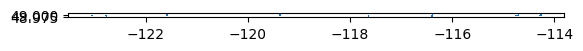

In [28]:
gdf.geometry.iloc[:10].plot()